# BRIEF
IT NOW CAN PERFORM REGRESSION AND multi class CLASSIFICATION



In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder

# Load Fashion MNIST dataset using Scikit-Learn
fashion_mnist = fetch_openml('Fashion-MNIST', version=1, as_frame=False)
images, labels = fashion_mnist["data"], fashion_mnist["target"].astype(int)

# Normalize pixel values to the range [0, 1]
images = images.astype('float32') / 255.0

# Reshape images from (num_samples, 784) to (num_samples, 28, 28, 1)
images = images.reshape((-1, 28, 28, 1))

# Split into train and test sets
train_images, test_images = images[:60000], images[60000:]
train_labels, test_labels = labels[:60000], labels[60000:]

# One-hot encode the labels
encoder = OneHotEncoder()  # No need for sparse=False
train_labels = encoder.fit_transform(train_labels.reshape(-1, 1))
test_labels = encoder.transform(test_labels.reshape(-1, 1))

# Flatten the images to (num_samples, 28 * 28)
train_images = train_images.reshape((-1, 28 * 28))
test_images = test_images.reshape((-1, 28 * 28))

# Print shapes to verify
print("Train images shape:", train_images.shape)  # (60000, 784)
print("Train labels shape:", train_labels.shape)  # (60000, 10)
print("Test images shape:", test_images.shape)    # (10000, 784)
print("Test labels shape:", test_labels.shape)    # (10000, 10)

# Reshape into batches
batch_size = 64  # Example batch size
num_batches = train_images.shape[0] // batch_size

# Reshape x_train to (num_batches, batch_size, 784)
x_train_batches = train_images[:num_batches * batch_size].reshape((num_batches, batch_size, 784))

# Convert sparse matrix to dense NumPy array
train_labels_dense = train_labels.toarray()

# Reshape y_train to (num_batches, batch_size, 10)
y_train_batches = train_labels_dense[:num_batches * batch_size].reshape((num_batches, batch_size, 10))

# Print shapes of batches
print("x_train_batches shape:", x_train_batches.shape)  # (num_batches, batch_size, 784)
print("y_train_batches shape:", y_train_batches.shape)  # (num_batches, batch_size, 10)

Train images shape: (60000, 784)
Train labels shape: (60000, 10)
Test images shape: (10000, 784)
Test labels shape: (10000, 10)
x_train_batches shape: (937, 64, 784)
y_train_batches shape: (937, 64, 10)


In [2]:
from core.nn import Linear, Network,batchnorm1d
layer1 = Linear((784, 128), activation="tanh",initialize_type="xavier")
bn1 = batchnorm1d(128)
layer2 = Linear((128, 64), activation="tanh",initialize_type="xavier")
bn2 = batchnorm1d(64)
layer3 = Linear((64, 10), activation="softmax",initialize_type="xavier")
layers = [layer1,bn1,layer2,bn2,layer3]
model = Network(layers,classification=True)
model.train(train_images, train_labels, epochs=30, batch_size=64, learning_rate=0.001, optimizer="adam",verbose=1)

weights (784, 128)
bias (1, 128)
weights (128, 64)
bias (1, 64)
weights (64, 10)
bias (1, 10)
Epoch 30/30 | [||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||] 100.00% | Train Loss = 0.1388
Function train took 118.3716 seconds to execute.


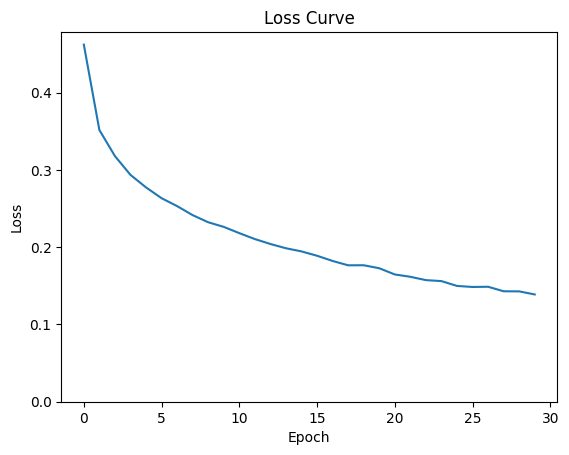

In [3]:
model.plot_loss()

In [4]:
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)  # This will give the class index for each sample
y_true_classes = np.argmax(test_labels, axis=1)  # This will give the true class index for each sample

# Calculate accuracy
accuracy = np.mean(y_pred_classes == y_true_classes.T)
print(f"Accuracy on test set: {accuracy:.4f}")


Accuracy on test set: 0.8865
